## Chapter 3 - Classification

#### MNIST

In [1]:
from sklearn.datasets import  fetch_openml
mnist = fetch_openml("mnist_784",version=1,as_frame=False)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#mnist.DESCR
print(mnist.data[0].shape)

(784,)


In [4]:
28*28

784

In [5]:
#mnist.feature_names

In [6]:
X,y = mnist["data"] , mnist["target"]
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

(784,)
(28, 28)


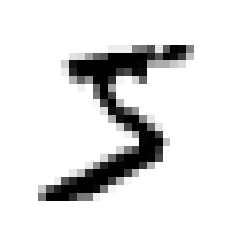

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
print(some_digit.shape)
some_digit_image = some_digit.reshape(28,28)
print(some_digit_image.shape)

plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

In [10]:
def plot_digit(data):
    """plot digit"""
    plt.figure(figsize=(3,3))
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary)
    plt.axis("off")
   

target :5


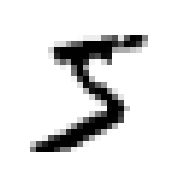

In [11]:
#visualization mnist datasets
pic_no = 0
example_images = X[pic_no]
target_images = y[pic_no]
print(f"target :{target_images}")
plot_digit(example_images)
plt.show()

In [12]:
#split datasets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Training a Binary Classifier

#### 5-detector
- Predicting between 2 classes , 5 and not-5

In [13]:
#Prepare data (cleaning)
import numpy as np
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[False False False ... False  True False]


In [14]:
#Training
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

[ True]


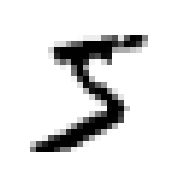

In [15]:
#Predicting
pic_predict = X[0]
print(sgd_clf.predict([pic_predict]))
plot_digit(pic_predict)

## Performance Measures

In [16]:
#Measuring Accuracy Using Cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
#perfactly case 
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [19]:
from sklearn.metrics import precision_score,recall_score

precision_score = precision_score(y_train_5,y_train_pred)
recall_score = recall_score(y_train_5,y_train_pred)

print(f"precision_score : {precision_score} ")
print(f"recall_score : {recall_score} ")

precision_score : 0.8370879772350012 
recall_score : 0.6511713705958311 


## F1 score

In [20]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5,y_train_pred))

0.7325171197343846


## Precision/Recall Trade-off

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [22]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [23]:
threshold = 8000 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [25]:
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [26]:
threshold = 5000 #changable

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

confusion_matrix(y_train_5,y_some_digit_pred)

array([[54378,   201],
       [ 3229,  2192]], dtype=int64)

In [27]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

recal:  0.4799852425751706
threshold:  3370.0194991439557
confusion_matrix :
 [[54290   289]
 [ 2820  2601]]


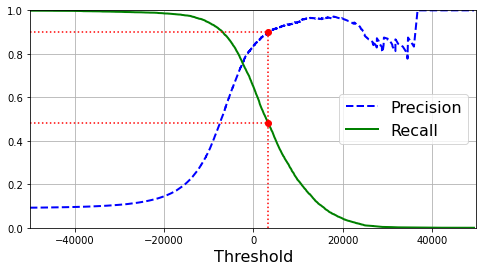

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

precision = 0.9 #changable
recall_90_precision = recalls[np.argmax(precisions >= precision)]
threshold_90_precision = thresholds[np.argmax(precisions >= precision)]

print('recal: ',recall_90_precision)
print('threshold: ',threshold_90_precision)

#trad off
threshold = threshold_90_precision
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

print('confusion_matrix :\n',confusion_matrix(y_train_5, y_some_digit_pred))

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., precision], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [precision,precision], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [precision], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                          # Not shown                                             # Not shown
plt.show()

## The ROC curve

In [29]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_5,y_scores)

0.005295076861063779


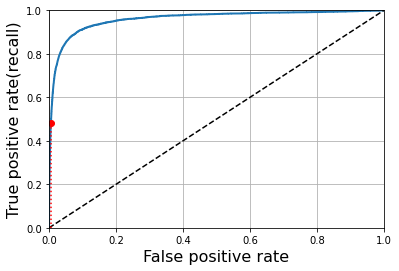

In [30]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate",fontsize=16)
    plt.ylabel("True positive rate(recall)",fontsize=16)
    plt.grid(True)

plot_roc_curve(fpr,tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
print(fpr_90)
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],"r:") #red vertical
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],"r:") #red holizontal
plt.plot([fpr_90],[recall_90_precision],"ro")

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [33]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
print(y_scores_forest)

[0.89 0.01 0.04 ... 0.98 0.08 0.06]


In [34]:
fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

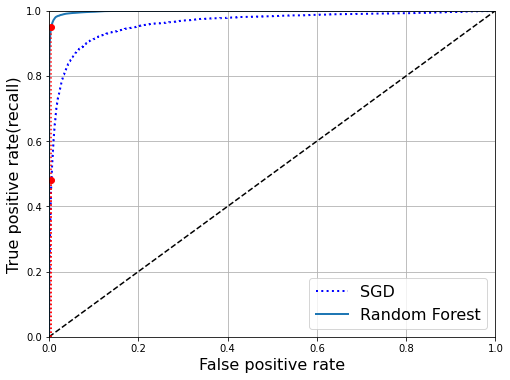

In [35]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [38]:
recall_90_precision

0.4799852425751706

## Multiclass Classification

In [40]:
# SVC  one vs one  training 45 binary classifier
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:10000],y_train[:10000])
svm_clf.predict([some_digit])


array([5], dtype=uint8)

In [41]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 0.73640179,  3.74695649,  6.22503198,  8.30364879, -0.30459674,
         9.30612304,  1.73376956,  3.76312093,  7.22128341,  3.7959883 ]])

In [42]:
#Predict classes
np.argmax(some_digit_scores)

5

In [43]:
#Target name
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
#mapping class 5
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [46]:
#SVC one the rest 
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [47]:
len(ovr_clf.estimators_)

10

In [48]:
#SGD classififier 
#one vs the rest 
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [50]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

## Standardized

In [51]:
#prepare model
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

## Error analysis